In [1]:
import numpy as np
import pandas as pd
from src.helpers.graphing import plot_movie_factors, plot_movie_factors_with_categories
from src.utils import vocabulary_based_one_hot_encode, load_pickle


In [2]:

# Constants
USER_HEADER = "userId"
ITEM_HEADER = "movieId"
RATING_HEADER = "rating"
FEATURE_TO_ENCODE = "genres"
CSV_FILES_DIR = "./datasets/movielens"  # The dataset subfolder
BASE_URL = "https://image.tmdb.org/t/p/w500"
TOTAL_MOVIES_COUNT = 10000  # Adjust based on your dataset
COLUMNS_PER_ROW = 4

# Genre list for one-hot encoding
ITEM_FEATURE_LIST = [
    "Action",
    "Adventure",
    "Animation",
    "Children",
    "Comedy",
    "Crime",
    "Documentary",
    "Drama",
    "Fantasy",
    "Film-Noir",
    "Horror",
    "IMAX",
    "Musical",
    "Mystery",
    "Romance",
    "Sci-Fi",
    "Thriller",
    "War",
    "Western",
]

In [3]:
item_database = (  # noqa
    pd.read_csv(f"{CSV_FILES_DIR}/movies.csv", dtype={ITEM_HEADER: str})
    .merge(
        pd.read_csv(f"{CSV_FILES_DIR}/links.csv", dtype={ITEM_HEADER: str}),
        on=ITEM_HEADER,
        how="left",
    )
    .assign(
        genres=lambda df: df[FEATURE_TO_ENCODE].apply(
            lambda genres: genres.split("|")
        ),
        features_hot_encoded=lambda df: df[FEATURE_TO_ENCODE].apply(
            lambda g: vocabulary_based_one_hot_encode(
                words=g, vocabulary=ITEM_FEATURE_LIST
            )
        ),
        features_count=lambda df: df["features_hot_encoded"].apply(
            lambda x: sum(x)
        ),
    )
    .set_index(ITEM_HEADER)
    .to_dict(orient="index")
)


In [4]:
indexed_data = load_pickle("./indexed_data.pkl")
model = load_pickle("./artifacts/checkpoints/als/1000000000/20250117-073926_lambda0.1_gamma0.1_tau0.1_n_epochs20_n_factors30.pkl")
movie_factors = model.item_factors

In [5]:
potters = ["4896", "5816", "8368", "40815", "54001", "69844", "81834", "88125", "186777", "267654"]
potters_titles = [item_database[p]["title"] for p in potters]
potters_indices = [indexed_data.id_to_item_bmap.inverse[p] for p in potters]

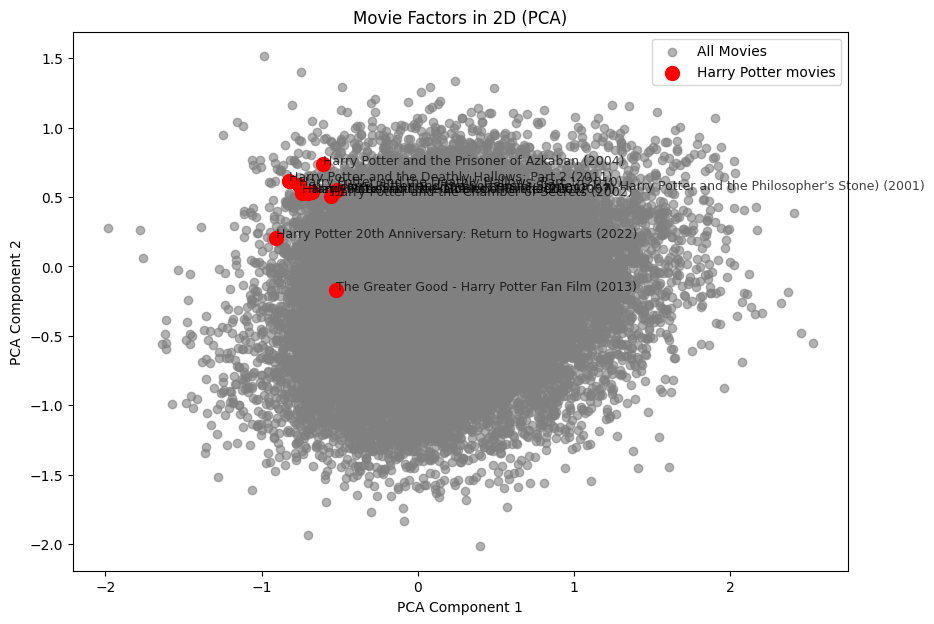

In [6]:
plot_movie_factors(movie_factors, potters_indices, potters_titles, label="Harry Potter movies")

In [7]:
movies_categories = []
movie_titles = []
error_indices = set()

for i in range(len(model.item_factors)):
    try:
        genres = item_database[indexed_data.id_to_item_bmap[i]]["genres"]
        title = item_database[indexed_data.id_to_item_bmap[i]]["title"]
        movie_titles.append(title)
        encoded = vocabulary_based_one_hot_encode(genres, ITEM_FEATURE_LIST)
        movies_categories.append(encoded)
    except IndexError:
        movies_categories.append(None)
        movie_titles.append(None)
        error_indices.add(i)


In [8]:
movie_titles

['Sense and Sensibility (1995)',
 'Leaving Las Vegas (1995)',
 'City of Lost Children, The (Cité des enfants perdus, La) (1995)',
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
 'Babe (1995)',
 'Dead Man Walking (1995)',
 'White Balloon, The (Badkonake sefid) (1995)',
 'Braveheart (1995)',
 'Taxi Driver (1976)',
 'Crimson Tide (1995)',
 'Doom Generation, The (1995)',
 'Living in Oblivion (1995)',
 'Clerks (1994)',
 'Eat Drink Man Woman (Yin shi nan nu) (1994)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Queen Margot (Reine Margot, La) (1994)',
 'Three Colors: Red (Trois couleurs: Rouge) (1994)',
 'Three Colors: Blue (Trois couleurs: Bleu) (1993)',
 'Swimming with Sharks (1995)',
 'Adventures of Priscilla, Queen of the Desert, The (1994)',
 'Forrest Gump (1994)',
 "Schindler's List (1993)",
 'Blade Runner (1982)',
 'Welcome to the Dollhouse (1995)',
 'Silence of the Lambs, The (1991)',
 'Fargo (1996)',
 'Nelly & Monsieur Arnau

In [9]:
plot_movie_factors_with_categories(
    model.item_factors, movies_categories, ITEM_FEATURE_LIST, movie_titles, error_indices
)

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'